# Telecom Churn

To Predict the customers who may switch telecom company in future

## Data: 
'0_customer_data.csv',
'1_internet_data.csv', 
'2_churn_data.csv'

### Importing required packages

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import os
import glob

# Import the numpy and pandas package
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## Reading and combining data to one DataFrame

In [2]:
path = "C:\\Users\\BK GAUTAM\\Desktop\\ML\\Telecom Churn\\data\\"
extension = 'csv'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))
print(result)
data1=pd.read_csv(path+result[0])
data2=pd.read_csv(path+result[1])
data3 = pd.read_csv(path+result[2])
data2.drop(['customerID'], axis=1, inplace=True)
data3.drop(['customerID'], axis=1, inplace=True)
df = pd.concat([data1, data2,data3], axis=1)

['0_customer_data.csv', '1_internet_data.csv', '2_churn_data.csv', 'churn_data_modified.csv', 'data.csv']


# Exploratory Data Analytics

In [3]:
df.shape

(7043, 21)

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,...,Yes,Yes,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,Yes,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,...,No,No,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Fiber optic,No,No,No,...,No,No,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## Data Cleaning

In [6]:
# Typecast 'TotalCharges' to float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype(np.float64).fillna(df.MonthlyCharges*df.tenure)

### Check for Null values

In [7]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

### Percentage Churn

In [8]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

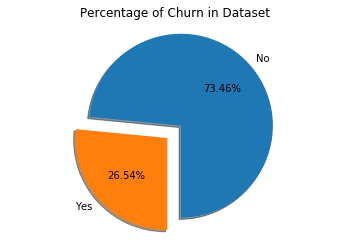

In [9]:
explode = (0.1, 0.1) 
sizes = df['Churn'].value_counts(sort = True)
fig1, ax1 = plt.subplots()
labels=['No','Yes']
rcParams['figure.figsize'] =5,5
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.2f%%',shadow=True, startangle=270)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Churn in Dataset')
plt.show()

## Categorical Data Distribution

In [10]:
columns = df.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

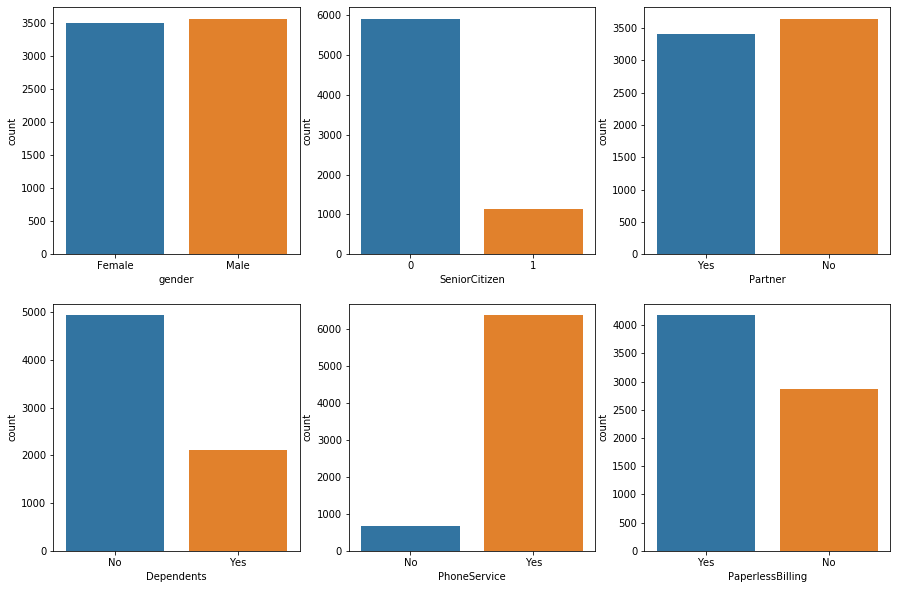

In [12]:
fig, axs = plt.subplots(2,3, figsize = (15,10))
sns.countplot("gender", data=df, ax=axs[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axs[0,1])
sns.countplot("Partner", data=df, ax=axs[0,2])
sns.countplot("Dependents", data=df, ax=axs[1,0])
sns.countplot("PhoneService", data=df, ax=axs[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axs[1,2])

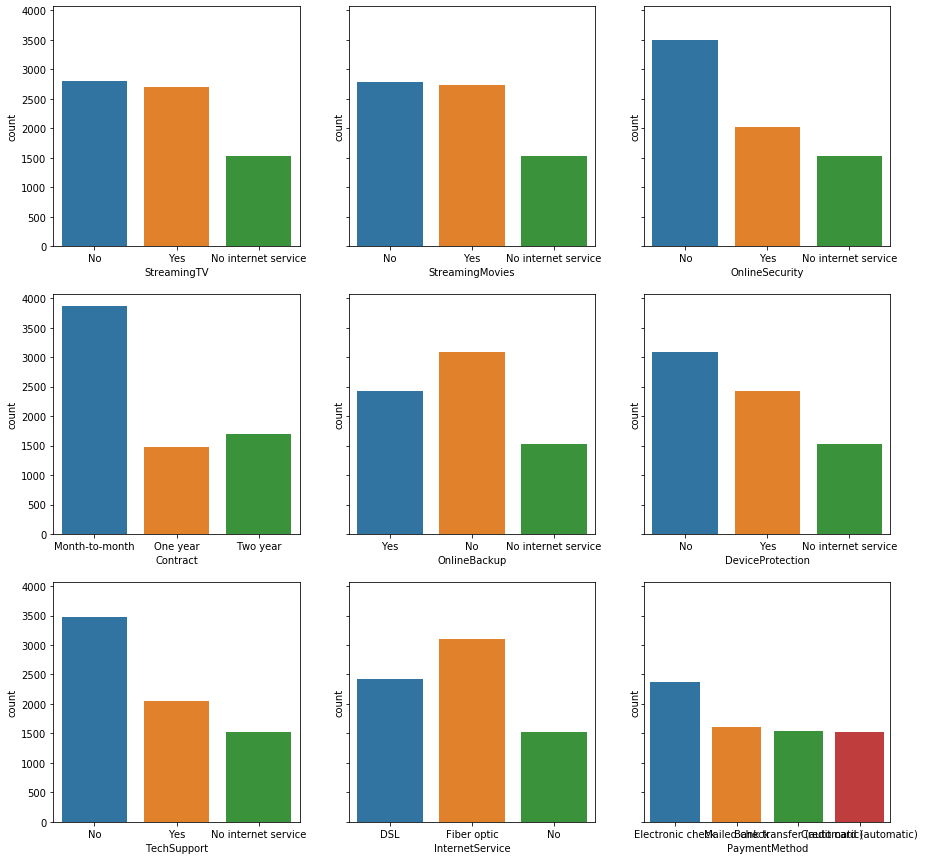

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)
sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("Contract", data=df, ax=axes[1,0])
sns.countplot("OnlineBackup", data=df, ax=axes[1,1])
sns.countplot("DeviceProtection", data=df, ax=axes[1,2])
sns.countplot("TechSupport", data=df, ax=axes[2,0])
sns.countplot("InternetService", data=df, ax=axes[2,1])
sns.countplot("PaymentMethod", data=df, ax=axes[2,2])

## Numerical Data Distribution

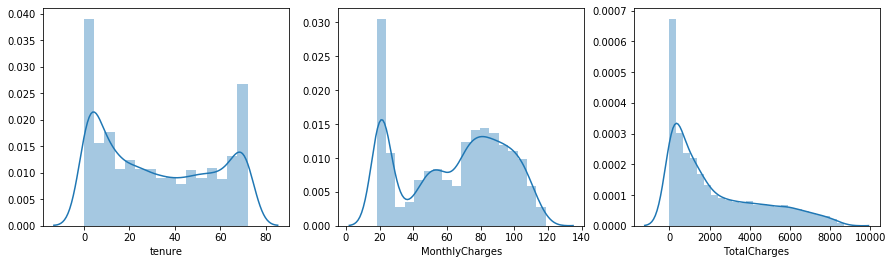

In [14]:
fig, axes = plt.subplots(1,3, figsize=(15, 4))
sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])
sns.distplot(df["TotalCharges"], ax=axes[2])

## Relation Plot-             Parameter v/s Churn

In [15]:
def binary_map(x):
    return x.map({"Yes": 1, "No":0})
df[['Churn']] = df[['Churn']].apply(binary_map)

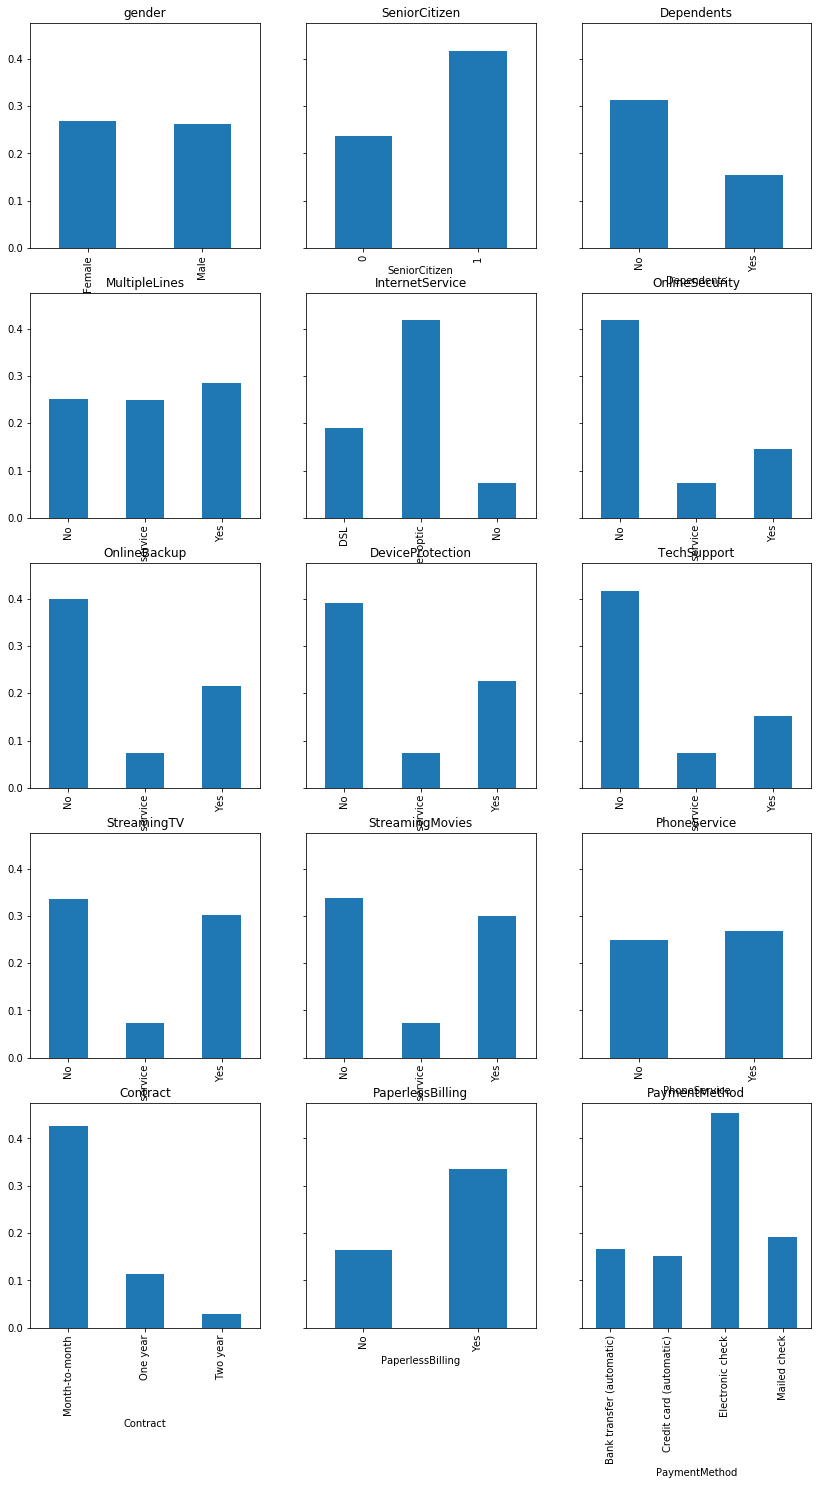

In [16]:
fig, axes = plt.subplots(5, 3,figsize=(14, 24), sharey=True)
att=[['gender','SeniorCitizen','Dependents'],['MultipleLines','InternetService', 'OnlineSecurity'],
     ['OnlineBackup', 'DeviceProtection','TechSupport'],['StreamingTV', 'StreamingMovies','PhoneService'],
     ['Contract', 'PaperlessBilling', 'PaymentMethod']]
for i in range(5):
    for j in range(3):
        df.groupby(by=att[i][j])['Churn'].mean().plot(kind='bar',ax=axes[i,j],title=att[i][j])
#fig.tight_layout()

# Data Preprocessing

### Drop columns not affecting Churn

In [18]:
df.drop(['customerID','TotalCharges','gender'], axis=1, inplace=True)

### Linear Data Encoding

In [19]:
#Linear Encoding
col_linearEncoding=['Partner', 'Dependents', 'PaperlessBilling','PhoneService']#'PhoneService'
def binary_map(x):
    return x.map({"Yes": 1, "No":0})
df[col_linearEncoding] = df[col_linearEncoding].apply(binary_map)

### One-Hot Encoding

In [20]:
#One-Hot Encoding
#dropping first column
col_oneHot1=['PaymentMethod','Contract','InternetService','OnlineSecurity','MultipleLines']
for c in col_oneHot1:
    status = pd.get_dummies(df[c],prefix=c, prefix_sep='_', drop_first = True)
    df = pd.concat([df, status], axis = 1)
    df.drop([c], axis = 1, inplace = True)
#dropping column with No internet service
col_oneHot3=['OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
remov=['OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service']
for c in col_oneHot3:
    status = pd.get_dummies(df[c],prefix=c, prefix_sep='_', drop_first = False)
    df = pd.concat([df, status], axis = 1)
    df.drop([c], axis = 1, inplace = True)
df.drop(remov, axis = 1, inplace = True)

## Correlation Plot b/w independent variable & Churn

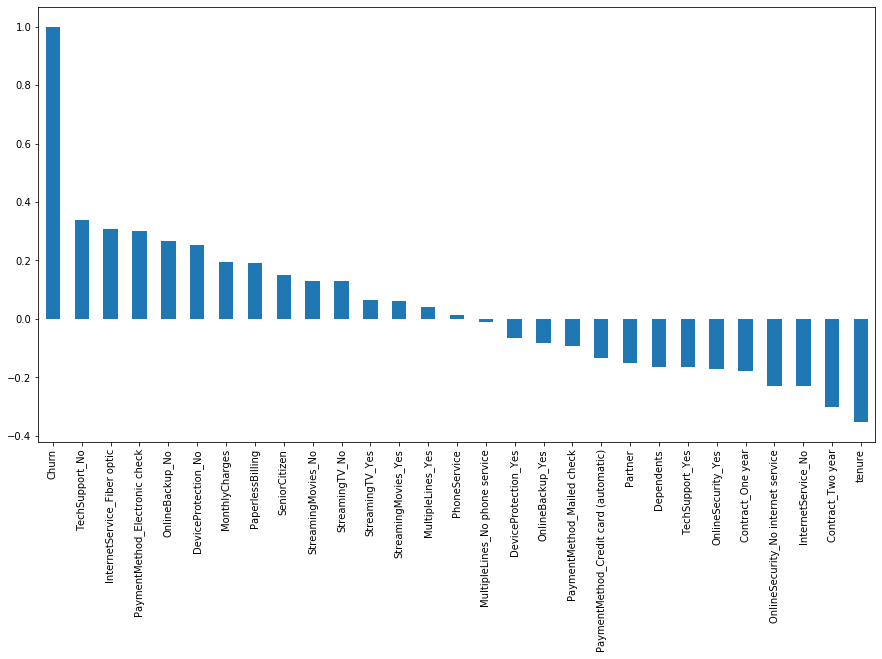

In [21]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### Scaling Data

In [22]:
sc = MinMaxScaler()
df['tenure'] = sc.fit_transform(df[['tenure']])
df['MonthlyCharges'] = sc.fit_transform(df[['MonthlyCharges']])
#df['TotalCharges'] = sc.fit_transform(df[['TotalCharges']])

### Resampling of Data

Text(0.5, 1.0, 'Class Distribution Before Resampling')

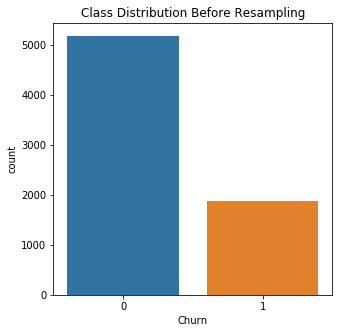

In [23]:
sns.countplot('Churn', data=df).set_title('Class Distribution Before Resampling')

In [24]:
df_no = df[df.Churn == 0]
df_yes = df[df.Churn == 1]

In [26]:
df_no_downsampled = df_no.sample(n=len(df_yes), replace=True, random_state=42)
print(len(df_no_downsampled))

1869


Text(0.5, 1.0, 'Class Distribution After Resampling')

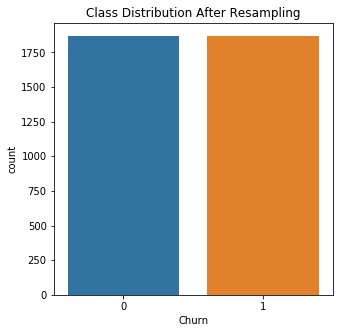

In [27]:
df_downsampled = df_yes.append(df_no_downsampled).reset_index(drop=True)
sns.countplot('Churn', data=df_downsampled).set_title('Class Distribution After Resampling')

# Model Creation

### Split Data into x and y datasets

In [28]:
from sklearn.model_selection import train_test_split
x = df_downsampled.drop(['Churn'], axis=1) #features (independent variables)
y = df_downsampled['Churn'] #target (dependent variable)

### Split training and testing data

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

### Logistic Regression

In [30]:
model = LogisticRegression()
result = model.fit(x_train, y_train)

In [31]:
y_pred = model.predict(x_test)
print (metrics.accuracy_score(y_test, y_pred))

0.7379679144385026


# Model Evaluation

In [32]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'],index = ['Actual Negative', 'Actual Positive'])
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,266,108
Actual Positive,88,286


### Confusion Matrix

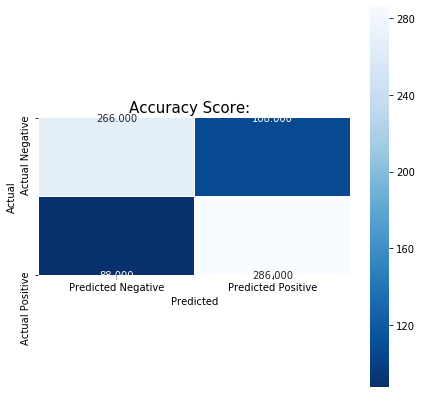

In [33]:
plt.figure(figsize=(7,7))
sns.heatmap(cm_df, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(" ")
plt.title(all_sample_title, size = 15);

### Accuracy, Specificity, Precision, Recall, F score

In [34]:
a=[]
a.append(model.score(x_test,y_test))
a.append(cm[1,1]/(cm[1,0]+cm[1,1]))
a=a+list(metrics.precision_recall_fscore_support(y_test, y_pred, average='weighted'))
report=pd.DataFrame(a, columns = ['Value'],index = ['Accuracy','Specificity','Precision', 'Recall/Sensitivity','F score','Support'])
report

,Value
Accuracy,0.737968
Specificity,0.764706
Precision,0.738650
Recall/Sensitivity,0.737968
F score,0.737780
Support,NaN
